In [1]:
import os
import json
import random
import sys

import numpy as np
import torch

from unityagents import UnityEnvironment

import TD3

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from main import UnityWrapper
from main import evaluate_policy
from main import executable

In [4]:
def plot_scores(scores):
    n = len(scores)
    l30 = np.ones(n) * 30
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.axis((0, 200, 0, 45))
    plt.plot(np.arange(1, n + 1), scores, '-r', label='score')
    plt.plot(np.arange(1, n + 1), np.ones(n) * 30, '-g', label='30')
    plt.plot(np.arange(1, n + 1), np.ones(n) * scores.mean(), '-b', label='mean')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [5]:
unity = UnityEnvironment(file_name=executable(), no_graphics=True)
env = UnityWrapper(unity, train_mode=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
seed = 0
for x in os.urandom(4):
    seed <<= 8
    seed += x

print('Set seed as {}'.format(seed))
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

Set seed as 4113040598


In [7]:
file_name = 'pytorch_models/'
state_dim = env.observation_space
action_dim = env.action_space
max_action = 1

policy = TD3.TD3(state_dim, action_dim, max_action)
policy.load('TD3_Reacher-v2_3', directory="./pytorch_models")

In [8]:
rewards = evaluate_policy(env, policy, 200)

---------------------------------------
Evaluation over 200 episodes: 38.988349
---------------------------------------


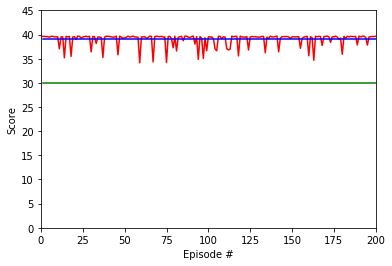

In [9]:
plot_scores(rewards)

In [10]:
env.close()

In [11]:
import json

with open('results.json', 'w') as fd:
    json.dump(list(rewards), fd)